In [15]:
import pandas as pd

df = pd.read_csv('HitenData2013.txt', header=None, delim_whitespace=' ')
features = ['LAT', 'LON', 'LABEL', 'NTL', 'NDVI', 'RD']
df.columns = features

df = df[['LAT', 'LON', 'NTL', 'NDVI', 'RD', 'LABEL']]
df.reset_index(inplace = True, drop = True)

In [16]:
df.head()

,LAT,LON,NTL,NDVI,RD,LABEL
0,17.3775,78.04750,0.25143,0.46807,0.0,2
1,17.3825,78.04750,0.30026,0.43132,0.0,2
2,17.3775,78.05251,0.99153,0.46602,0.0,2
3,17.3325,78.06250,1.10459,0.38557,0.0,2
4,17.3375,78.06250,0.28864,0.40016,0.0,2


In [17]:
df['LABEL'].describe()

count    26443.000000
mean         2.944031
std          0.873973
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: LABEL, dtype: float64

In [18]:
test = pd.DataFrame()
test = df.loc[df['LABEL'] == 4]
test.head()

,LAT,LON,NTL,NDVI,RD,LABEL
2561,17.3325,78.0175,1.46442,0.40197,0.0,4
2567,17.3325,78.0225,1.19423,0.40727,0.0,4
2573,17.3175,78.0275,1.07576,0.40292,0.0,4
2575,17.3275,78.0275,1.73567,0.41296,0.0,4
2587,17.3175,78.0325,1.08378,0.41826,0.0,4


In [19]:
train1 = pd.DataFrame()
train1 = df.loc[df['LABEL'] == 1]

In [20]:
train2 = pd.DataFrame()
train2 = df.loc[df['LABEL'] == 2]
train3 = pd.DataFrame()
train3 = df.loc[df['LABEL'] == 3]
train = pd.DataFrame()
train = pd.concat([train1, train2, train3],ignore_index=True)

In [21]:
train['LABEL'].describe()

count    18789.000000
mean         2.513864
std          0.660064
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: LABEL, dtype: float64

In [22]:
y_col = 'LABEL'
y = train[y_col]
X = train[train.columns.drop(y_col)]
X = train[train.columns.drop(["LAT","LON"])]

In [23]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [24]:
test = test[test.columns.drop(y_col)]
test = test[test.columns.drop(['LAT','LON'])]
test

,NTL,NDVI,RD
2561,1.46442,0.40197,0.0
2567,1.19423,0.40727,0.0
2573,1.07576,0.40292,0.0
2575,1.73567,0.41296,0.0
2587,1.08378,0.41826,0.0
...,...,...,...
26296,0.94184,0.40986,0.0
26315,1.01086,0.42000,0.0
26372,0.95100,0.41337,0.0
26384,1.34980,0.42020,0.0


In [25]:
y_hat = clf.predict(test)

c:\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- LABEL

  warnings.warn(message, FutureWarning)


ValueError: X has 3 features, but SVC is expecting 4 features as input.

In [13]:
y_hat

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [14]:
test['pred'] = y_hat

In [15]:
j = 0
for i in range(len(df['LAT'])):
    if df['LABEL'][i] == 4:
        df['LABEL'][i] = y_hat[j]
        j= j+1
        

C:\Users\Hiten\AppData\Local\Temp\ipykernel_18824\758021898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LABEL'][i] = y_hat[j]


In [16]:
df.head()

,LAT,LON,NTL,NDVI,RD,LABEL
0,17.3775,78.04750,0.25143,0.46807,0.0,2
1,17.3825,78.04750,0.30026,0.43132,0.0,2
2,17.3775,78.05251,0.99153,0.46602,0.0,2
3,17.3325,78.06250,1.10459,0.38557,0.0,2
4,17.3375,78.06250,0.28864,0.40016,0.0,2


In [17]:
df.to_csv('pred_2020.txt')

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering

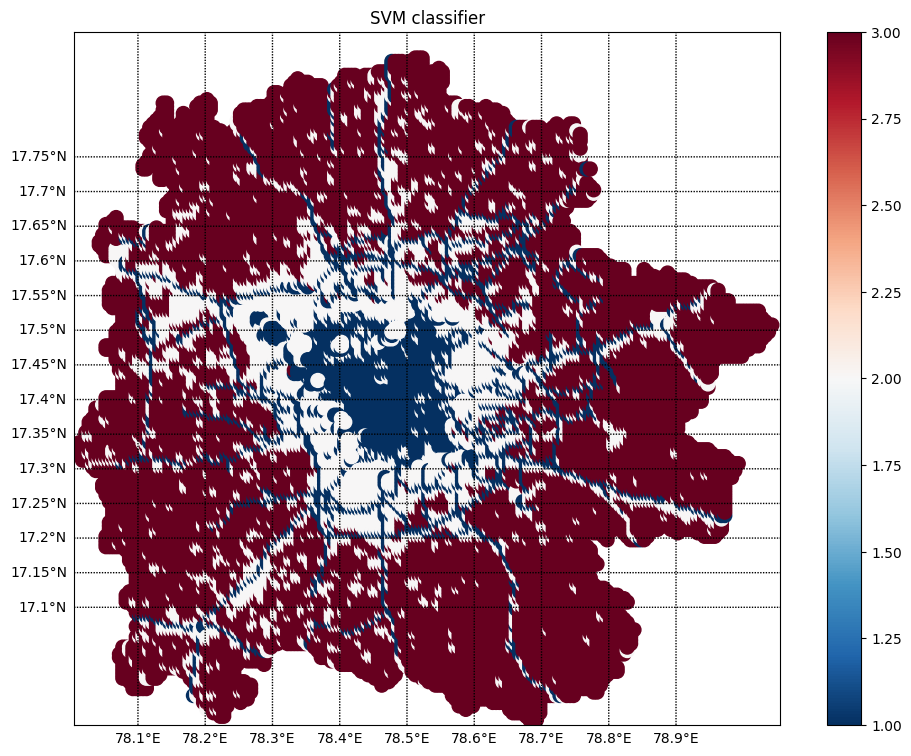

In [19]:
lat = df['LAT'][:].values
lon = df['LON'][:].values
labels = df['LABEL'][:].values

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
            llcrnrlat = 16.930,
            urcrnrlat = 17.930,
            llcrnrlon = 78.005,
            urcrnrlon = 79.055,
            resolution = 'c')
m.drawcoastlines()

x, y = m(list(df['LON']), list(df['LAT']))
m.scatter(x, y,
           c = df['LABEL'],
           s = 100,
           cmap = 'RdBu_r')
plt.colorbar()
m.drawparallels(np.arange(17.10,17.80,0.05),labels=[True,False,False,False])
m.drawmeridians(np.arange(78,78.9,0.1),labels=[0,0,0,1])
plt.title('SVM classifier')
plt.show()